# Analyzing the Chinook Dataset

In this project, I explore and analyze the Chinook dataset, which is a sample dataset with information on a system similar to iTunes. 

In [1]:
# Start by importing modules and running Jupyter magic.
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
%matplotlib inline

In [2]:
# Create a function that takes in a SQL query and 
# returns a pandas dataframe of the results.
def run_query(q):
    with sqlite3.connect('chinook.db') as conn:
        return pd.read_sql(q, conn)

In [3]:
# Create a function that takes a SQL command and executes it
def run_command(c):
    with sqlite3.connect('chinook.db') as conn:
        conn.isolation_level = None
        conn.execute(c)

In [48]:
# Create a function that returns a list of all tables and views
def show_tables():
    show_query = "SELECT name, type FROM sqlite_master \
        WHERE type IN ('table', 'view')"
    return run_query(show_query)

## Most Popular Music Genres in America

Let's start by seeing which genres sell the most tracks in the USA and create a visualization of that data.

In [53]:
q1 = '''
WITH 
usa_sales AS (
    SELECT 
        SUM(quantity) total
    FROM invoice_line il
    INNER JOIN invoice i ON i.invoice_id = il.invoice_id
    WHERE i.billing_country = 'USA')
SELECT 
    g.name genre, 
    SUM(il.quantity) num_sold, 
    ROUND((CAST(SUM(il.quantity) as float) / (SELECT total FROM usa_sales)) * 100, 2) \
        percent_sold 
FROM invoice_line il
INNER JOIN invoice i ON i.invoice_id = il.invoice_id 
INNER JOIN track t ON il.track_id = t.track_id 
INNER JOIN genre g ON t.genre_id = g.genre_id 
WHERE i.billing_country = 'USA' 
GROUP BY 1 
ORDER BY 2 DESC
'''

run_query(q1)

,genre,num_sold,percent_sold
0,Rock,561,53.38
1,Alternative & Punk,130,12.37
2,Metal,124,11.80
3,R&B/Soul,53,5.04
4,Blues,36,3.43
5,Alternative,35,3.33
6,Latin,22,2.09
7,Pop,22,2.09
8,Hip Hop/Rap,20,1.90
9,Jazz,14,1.33


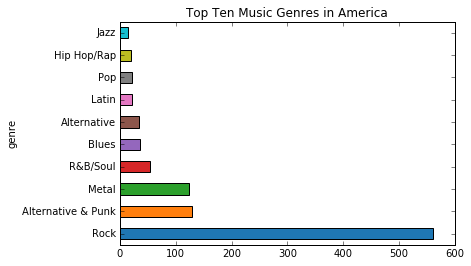

In [63]:
genre_sales_usa = run_query(q1)

# Use .set_index() to make the genres the index labels for the plots.
genre_sales_usa.set_index('genre', drop=True, inplace=True)
colors = [(31/255, 119/255, 180/255), (255/255, 127/255, 14/255), (44/255, 160/255, 44/255), (214/255, 39/255, 40/255), (148/255, 103/255, 189/255), (140/255, 86/255, 75/255), (227/255, 119/255, 194/255), (127/255, 127/255, 127/255), (188/255, 189/255, 34/255), (23/255, 190/255, 207/255),(148/255, 103/255, 189/255), (140/255, 86/255, 75/255)]
genre_sales_usa.num_sold.iloc[:10].plot.barh(title = "Top Ten Music Genres in America", color=colors)

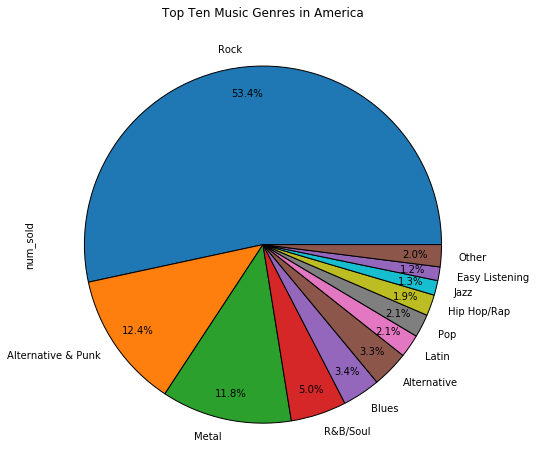

In [66]:
# Create an "other" category for better visualization.
# Select all genres that have more than 1% of the total.
genre_sales_usa = genre_sales_usa.iloc[:11]
genre_sales_usa.loc["Other"] = 21
genre_sales_usa.num_sold.plot.pie(figsize=(8,8), colors=colors,
                                     title = "Top Ten Music Genres in America",
                                     autopct='%1.1f%%', pctdistance = 0.85)

Representing more than half of all tracks sold in the USA, Rock is clearly a popular music choice in America. At approximately 12% each, Alternative & Punk and Metal are roughly tied for the second most popular genres. All of the other music genres have 5% of less of the total tracks sold. 

## Employee Sales Performance

Next, we'll examine the sales performance of the employees at Chinook. When a customer first makes a purchase from Chinook, they are assigned a sales support agent. We will analyze the purchasing behavior of customers for each employee to see which sales support agents are performing better or worse.

In [8]:
# Find the total dollar amount of sales assigned to each sales support agent
# Add any additional attributes that may be relevant to performance
q2 = '''
SELECT
    e.first_name||' '||e.last_name employee,
    e.hire_date,
    e2.first_name||' '||e2.last_name manager,
    SUM(i.total) total_sales
FROM employee e
INNER JOIN employee e2 ON e.reports_to = e2.employee_id
INNER JOIN customer c ON c.support_rep_id = e.employee_id
INNER JOIN invoice i ON c.customer_id = i.customer_id
WHERE e.title = 'Sales Support Agent'
GROUP BY 1
ORDER BY 4
'''

run_query(q2)

,employee,hire_date,manager,total_sales
0,Steve Johnson,2017-10-17 00:00:00,Nancy Edwards,1393.92
1,Margaret Park,2017-05-03 00:00:00,Nancy Edwards,1584.00
2,Jane Peacock,2017-04-01 00:00:00,Nancy Edwards,1731.51


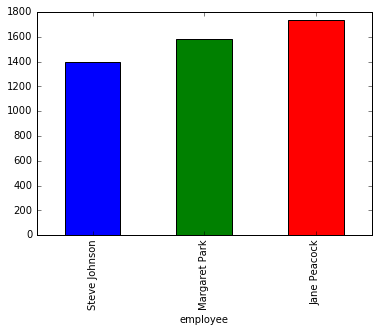

In [9]:
employee_sales = run_query(q2)

# Plot the sales of the three agents
employee_sales.set_index("employee", drop=True, inplace=True)
employee_sales.total_sales.plot.bar()

In [10]:
q3 = "SELECT distinct(invoice_date) FROM invoice"

run_query(q3)

,invoice_date
0,2017-01-03 00:00:00
1,2017-01-05 00:00:00
2,2017-01-06 00:00:00
3,2017-01-07 00:00:00
4,2017-01-10 00:00:00
5,2017-01-12 00:00:00
6,2017-01-13 00:00:00
7,2017-01-18 00:00:00
8,2017-01-20 00:00:00
9,2017-01-21 00:00:00


This fictional dataset shows invoices dated from January 2017 to December 2020. Therefore, we will assume that "today" is December 2020 and use this to determine the length of tenure of the three sales agents.

In [11]:
import datetime
import numpy as np
# Convert to datetime type
employee_sales['hire_date'] = pd.to_datetime(employee_sales['hire_date'])
# Create datetime object for "today"
today = datetime.datetime(year=2020, month=12, day=30)
# Calculate the length of tenure in months
employee_sales['tenure'] = (today - employee_sales['hire_date']) / np.timedelta64(1, 'M')
employee_sales

,hire_date,manager,total_sales,tenure
employee,,,,
Steve Johnson,2017-10-17,Nancy Edwards,1393.92,38.440214
Margaret Park,2017-05-03,Nancy Edwards,1584.00,43.926980
Jane Peacock,2017-04-01,Nancy Edwards,1731.51,44.978336


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9f489f54a8>,
      dtype=object)

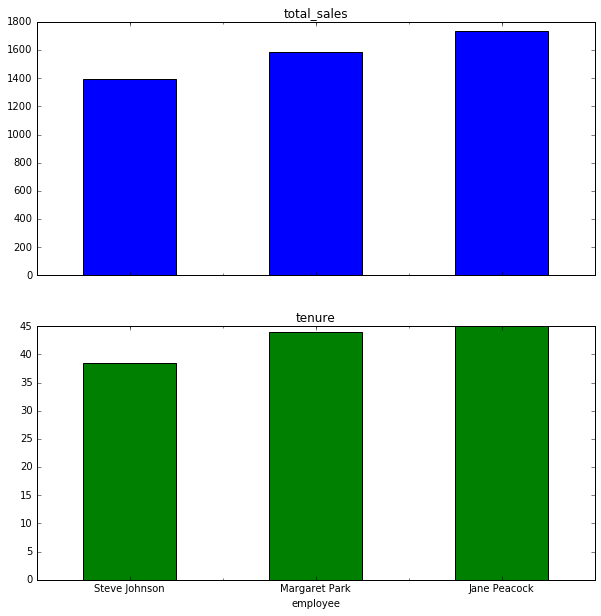

In [27]:
employee_sales[['total_sales','tenure']].plot.bar(figsize=(10,10),subplots=True, rot=0, legend=False)

All three sales agents have the same manager, so that is not a source of differences among their sales. The main difference between the employees seems to be their length of tenure. Steve Johnson has worked for 38 months, which is the least among the three sales agents, and he also has the smallest sales at \$1394. Jane Peacock has worked the most at 45 months and also has the most sales at \$1731. Margaret Park is in the middle at 44 months and \$1584. Therefore, length of time spent working at Chinook as a sales agent seems to be directly correlated with total sales.

## Customer Data by Country

Next, we will analyze the customer data by country; specifically, for each country, we will calculate the following:
 - total number of customers
 - total value of sales
 - average value of sales per customer
 - average order value

Those countries that have only one customer will be grouped as "Other".

In [13]:
# Create a new view that has a column where country is "Other" for
# the countries with only one customer
c1 = '''
CREATE VIEW country_data AS
WITH count_oth AS (
    SELECT
        COUNT(c.customer_id),
        CASE
            WHEN COUNT(c.customer_id) = 1 THEN "Other"
            ELSE c.country
            END AS country_oth
    FROM customer c
    GROUP BY c.country
    )
SELECT
    c.customer_id,
    CASE
        WHEN c.country NOT IN (SELECT country_oth FROM count_oth) THEN "Other"
        ELSE c.country
        END AS country_other
FROM customer c
'''

run_command(c1)

OperationalError: table country_data already exists

In [ ]:
# Check that the table is correct
q4 = "SELECT * FROM country_data"
run_query(q4)

In [24]:
q5 = '''
SELECT
    cd.country_other country,
    COUNT(cd.customer_id) num_customers,
    SUM(i.total) total_sales,
    ROUND(CAST(SUM(i.total) as float) / COUNT(DISTINCT(cd.customer_id)),2) avg_sales_per_cust,
    ROUND(AVG(i.total),2) avg_order_value
FROM country_data cd
INNER JOIN invoice i ON i.customer_id = cd.customer_id
GROUP BY 1
ORDER BY 
    CASE 
        WHEN country = "Other" THEN 0
        ELSE total_sales
        END
DESC;
'''

run_query(q5)

,country,num_customers,total_sales,avg_sales_per_cust,avg_order_value
0,USA,131,1040.49,80.04,7.94
1,Canada,76,535.59,66.95,7.05
2,Brazil,61,427.68,85.54,7.01
3,France,50,389.07,77.81,7.78
4,Germany,41,334.62,83.66,8.16
5,Czech Republic,30,273.24,136.62,9.11
6,United Kingdom,28,245.52,81.84,8.77
7,Portugal,29,185.13,92.57,6.38
8,India,21,183.15,91.57,8.72
9,Other,147,1094.94,73.00,7.45


In [25]:
# Save these results to a DataFrame.
countries = run_query(q5)

# Use .set_index() to make the countries the index labels for the plots.
countries.set_index('country', drop=True, inplace=True)

# Use the workaround to get each bar to be a different color.
# From: https://github.com/pandas-dev/pandas/issues/16822
# Colors are the Tableau 10 from http://tableaufriction.blogspot.com/2012/11/finally-you-can-use-tableau-data-colors.html
countries['color'] = [(31/255, 119/255, 180/255), (255/255, 127/255, 14/255), (44/255, 160/255, 44/255), (214/255, 39/255, 40/255), (148/255, 103/255, 189/255), (140/255, 86/255, 75/255), (227/255, 119/255, 194/255), (127/255, 127/255, 127/255), (188/255, 189/255, 34/255), (23/255, 190/255, 207/255)]

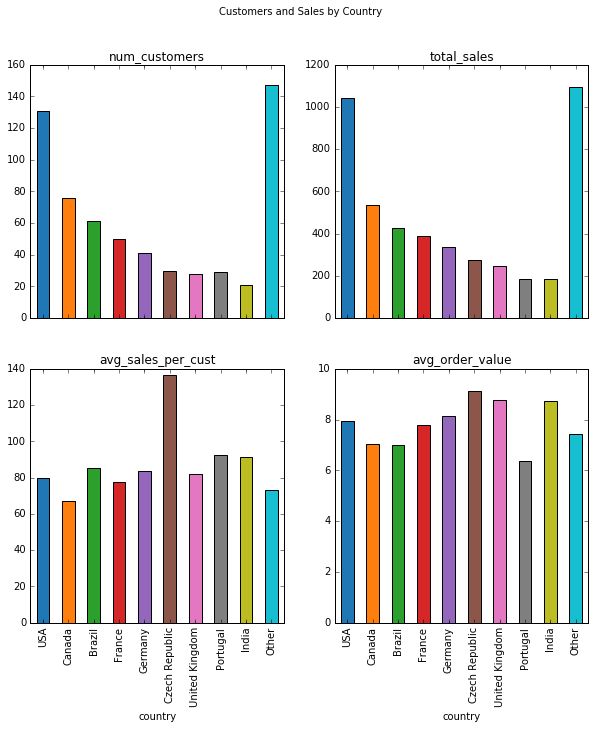

In [26]:
# Create a 2x2 figure.
axes = countries.plot.bar(figsize=(10,10), subplots=True, 
                          layout=(2,2), rot=90, 
                          title="Customers and Sales by Country", 
                          legend=False, color=[countries['color']])

Based on the above results, Chinook's marketing team should target the Czech Republic as it seems to have the greatest potential for growth. Specifically, the Czech Republic has by far the highest average sales per customer, meaning that a single customer from that country would result in more profit than a customer from another country. In addition, there is currently a low number of Czech customers (30), so marketing could be very effective in this area. 

## Albums vs. Tracks

Currently, the Chinook store is setup to allow customers to either purchase a whole album or purchase a collection of one or more individual tracks. The store does not allow customers to purchase a whole album and then add individual tracks to that purchase. 

Let's find out what percentage of purchases are individual tracks and what percentage are whole albums. In this case, we have two 'edge cases' to consider:
 - Albums that have only one or two tracks are likely to be purchased by customers as part of a collection of individual tracks.
 - Customers may decided to manually select every track from an album and then add a few individual tracks from other albums to their purchase.

Here, we will assume that the second case does not happen often and can be safely ignored. The first case would not affect potential revenue from selling individual tracks as opposed to full albums and can therefore also be neglected.

In [75]:
q6 = '''
WITH 
    albums AS (
        SELECT 
            album_id,
            COUNT(track_id) alb_tr_cnt
        FROM track
        GROUP BY 1
        HAVING alb_tr_cnt > 2),
    invoice_al AS (
        SELECT
            il.invoice_id,
            t.album_id,
            COUNT(DISTINCT(t.track_id)) inv_tr_cnt
        FROM track t
        INNER JOIN invoice_line il ON il.track_id = t.track_id
        GROUP BY 1, 2)

SELECT 
    CASE
        WHEN inv_tr_cnt = alb_tr_cnt THEN 'album'
        ELSE 'tracks'
        END AS al_tr,
    COUNT(DISTINCT(i.invoice_id)) num_purchases,
    ROUND(CAST(COUNT(DISTINCT(i.invoice_id)) AS Float) / (SELECT COUNT(DISTINCT(invoice_id)) FROM invoice_line) * 100, 0) percent_purchases
FROM invoice_al i
INNER JOIN albums a ON a.album_id = i.album_id
GROUP BY 1
'''
run_query(q6)

,al_tr,num_purchases,percent_purchases
0,album,111,18.0
1,tracks,500,81.0


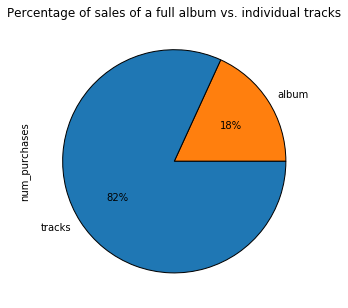

In [74]:
# Save the results to a DataFrame.
alb_trk = run_query(q6) 

# Use .set_index() to make the genres the index labels for the plots.
alb_trk.set_index('al_tr', drop=True, inplace=True)

alb_trk.num_purchases.plot.pie(figsize=(5,5), 
                                   title = "Percentage of sales of a full album vs. individual tracks",
                                   autopct='%1.f%%',
                                   colors=[(255/255, 127/255, 14/255), (31/255, 119/255, 180/255)])

Because more than 80% of all invoices are individual track sales, Chinook could save money by no longer purchasing full albums from record companies without seeing a drop-off in sales. 

### Next Steps

Some potential next steps for analysis:
 - Which artist is used in the most playlists?
 - How many tracks have been purchased vs not purchased?
 - Is the range of tracks in the store reflective of their sales popularity?
 - Do protected vs non-protected media types affect popularity?